In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('airbnb_london.csv')
df.shape

(5379, 19)

In [ ]:
df.head(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399
5,354.194595,Entire home/apt,False,False,2.0,False,0,1,9.0,93.0,0,4.467894,0.350749,321.864600,22.374063,703.068564,12.583702,-0.18805,51.49473
6,430.395823,Private room,False,True,2.0,True,0,1,10.0,97.0,1,1.787295,0.253827,509.098946,35.389453,1071.720709,19.181933,-0.11023,51.52023
7,244.831722,Private room,False,True,2.0,False,0,1,9.0,88.0,1,2.430836,0.546799,412.057147,28.643699,932.666193,16.693100,-0.11644,51.52905
8,438.157059,Entire home/apt,False,False,4.0,False,0,1,9.0,87.0,1,1.490442,0.126230,575.923337,40.034676,1454.379423,26.030858,-0.13621,51.52057
9,128.883558,Private room,False,True,2.0,True,1,0,10.0,97.0,1,12.806673,5.292438,96.536295,6.710614,195.835897,3.505121,0.03848,51.45827


In [ ]:
df[df.duplicated()]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat


На цьому кроці ми зробили перевірку на наявність дублікатів, як бачимо - в цьому датасеті їх немає.

In [ ]:
df.isnull().sum()

,0
realSum,0
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0
guest_satisfaction_overall,0


Тут ми перевіряємо, чи є пусті значення в датасеті, як бачимо - таких теж немає.

<Axes: >

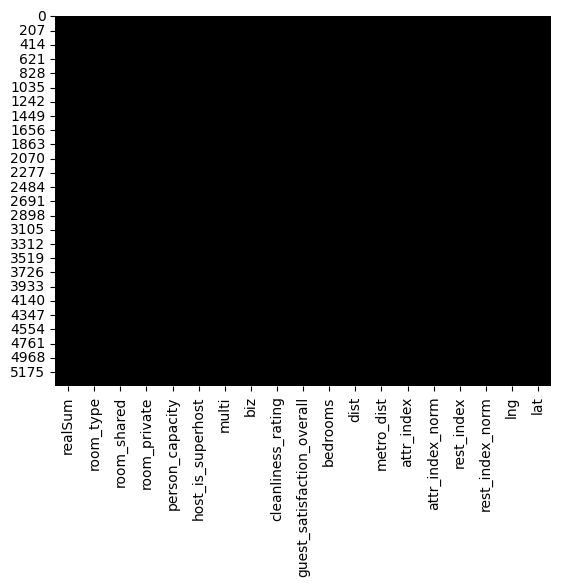

In [ ]:
colours = ['black', 'yellow']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), cbar=False)

На додачу до попередньої перевірки зробили графічну перевірку, в якій пусті значення відображалися б жовтим кольором, якщо б вони були.

Переходимо до пошуку викидів, перш за все, проаналізуємо співвідношення загальної ціни орендного житла на Airbnb в залежності від максимальної кількісті людей, які можуть перебувати в приміщенні, а також від відстані до центру міста

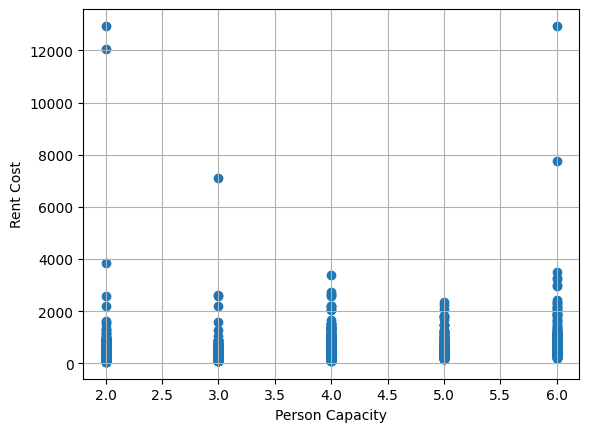

In [ ]:
X = df['person_capacity']
Y = df['realSum']
plt.scatter(X, Y)
plt.xlabel('Person Capacity')
plt.ylabel('Rent Cost')
plt.grid()
plt.show()

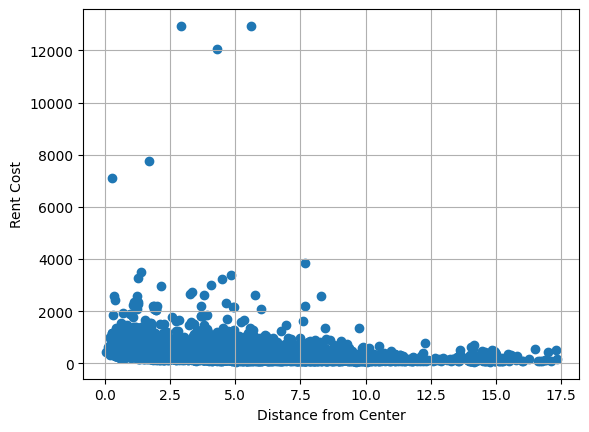

In [ ]:
X1 = df['dist']
Y1 = df['realSum']
plt.scatter(X1, Y1)
plt.xlabel('Distance from Center')
plt.ylabel('Rent Cost')
plt.grid()
plt.show()

На обох графіках бачимо 3 підозрілі точки, у яких ціна на оренду перевищує 12 тисяч. Щоб переконатися в тому, що ці значення є викидами побудуємо ще один графік **boxplot**.

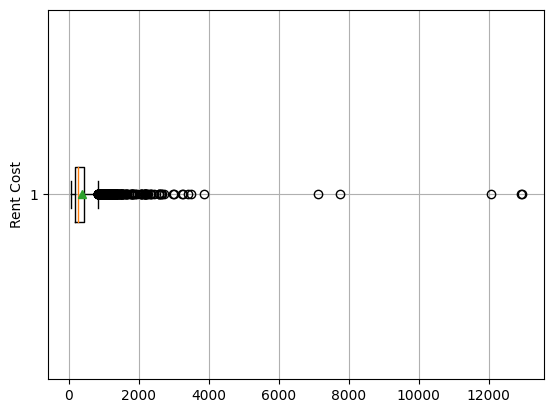

In [ ]:
plt.boxplot(Y, showmeans=True, vert=False)
plt.ylabel('Rent Cost')
plt.grid()
plt.show()

Тепер ми точно переконалися, що ці 3 точки з максимальними значеннями є викидами, будемо на місці їх значень робити мітки "**NaN**".

In [ ]:
df[df.realSum == df.realSum.max()]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
3550,12937.275101,Entire home/apt,False,False,6.0,False,0,0,10.0,100.0,2,2.938307,0.619716,386.733299,26.883339,781.529958,13.988024,-0.14658,51.5319


In [ ]:
df.loc[df.realSum == df.realSum.max(), 'realSum'] = np.NaN
df[df.isnull().sum(axis=1) > 0]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
3550,NaN,Entire home/apt,False,False,6.0,False,0,0,10.0,100.0,2,2.938307,0.619716,386.733299,26.883339,781.529958,13.988024,-0.14658,51.5319


In [ ]:
df[df.realSum == df.realSum.max()]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
4559,12929.513864,Private room,False,True,2.0,False,0,0,7.0,80.0,1,5.623463,0.485578,233.766463,16.250018,444.0509,7.947737,-0.04987,51.49397


In [ ]:
df.loc[df.realSum == df.realSum.max(), 'realSum'] = np.NaN
df[df.isnull().sum(axis=1) > 0]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
3550,NaN,Entire home/apt,False,False,6.0,False,0,0,10.0,100.0,2,2.938307,0.619716,386.733299,26.883339,781.529958,13.988024,-0.14658,51.53190
4559,NaN,Private room,False,True,2.0,False,0,0,7.0,80.0,1,5.623463,0.485578,233.766463,16.250018,444.050900,7.947737,-0.04987,51.49397


In [ ]:
df[df.realSum == df.realSum.max()]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
562,12048.731155,Private room,False,True,2.0,False,0,0,8.0,89.0,3,4.30358,0.709035,318.806306,22.161469,666.006206,11.920351,-0.18071,51.48849


In [ ]:
df.loc[df.realSum == df.realSum.max(), 'realSum'] = np.NaN
df[df.isnull().sum(axis=1) > 0]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
562,NaN,Private room,False,True,2.0,False,0,0,8.0,89.0,3,4.303580,0.709035,318.806306,22.161469,666.006206,11.920351,-0.18071,51.48849
3550,NaN,Entire home/apt,False,False,6.0,False,0,0,10.0,100.0,2,2.938307,0.619716,386.733299,26.883339,781.529958,13.988024,-0.14658,51.53190
4559,NaN,Private room,False,True,2.0,False,0,0,7.0,80.0,1,5.623463,0.485578,233.766463,16.250018,444.050900,7.947737,-0.04987,51.49397


In [ ]:
df[df.realSum == df.realSum.max()]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
4109,7759.354641,Entire home/apt,False,False,6.0,False,0,0,10.0,100.0,3,1.709108,0.296463,626.744917,43.567483,1012.580794,18.123432,-0.13984,51.49503


Починаючи з цього значення **realSum** будемо вважати їх всі допустими.

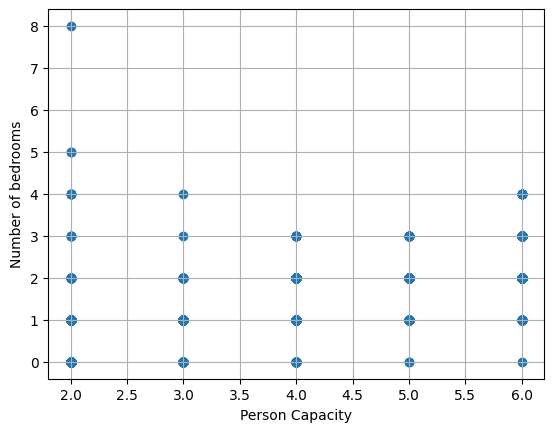

In [ ]:
X2 = df['person_capacity']
Y2 = df['bedrooms']
plt.scatter(X2, Y2)
plt.xlabel('Person Capacity')
plt.ylabel('Number of bedrooms')
plt.grid()
plt.show()

Побудувавши графік кількості спальних місць та максимальної кількості людей в орендному житлі бачимо, що кількість спалень дійсно виглядає підозрілою, наприклад, 0 спальних місць або 1 спальне місце для 6 людей, але в самому датасеті ніяк не вказано, чи мають бути спальні місця для кожної людини, і чи залишаються гості точно з ночівлею, тому, на мою думку, помічати викиди за цими характеристикам не є коректним.

Пробіжимось по всім іншим числовим характеристикам для пошука викидів.

In [ ]:
df['cleanliness_rating'].describe()

,cleanliness_rating
count,5379.000000
mean,9.193902
std,1.151321
min,2.000000
25%,9.000000
50%,10.000000
75%,10.000000
max,10.000000


In [ ]:
df['guest_satisfaction_overall'].describe()

,guest_satisfaction_overall
count,5379.000000
mean,90.921175
std,11.289857
min,20.000000
25%,87.000000
50%,94.000000
75%,99.000000
max,100.000000


In [ ]:
df['dist'].describe()

,dist
count,5379.000000
mean,5.327620
std,2.705986
min,0.040561
25%,3.545684
50%,4.939138
75%,6.838065
max,17.321199


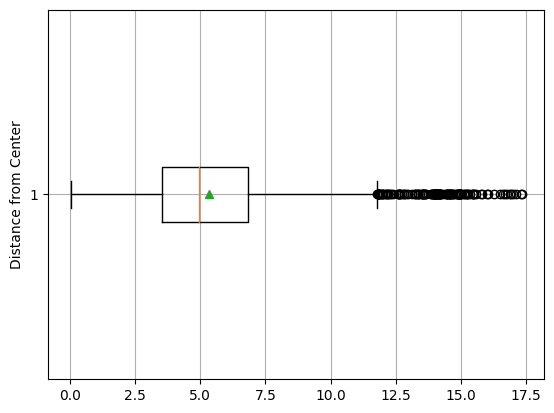

In [ ]:
Y3 = df['dist']

plt.boxplot(Y3, showmeans=True, vert=False)
plt.ylabel('Distance from Center')
plt.grid()
plt.show()

In [ ]:
df['metro_dist'].describe()

,metro_dist
count,5379.000000
mean,1.016534
std,1.265193
min,0.013875
25%,0.324035
50%,0.536131
75%,1.090765
max,9.174094


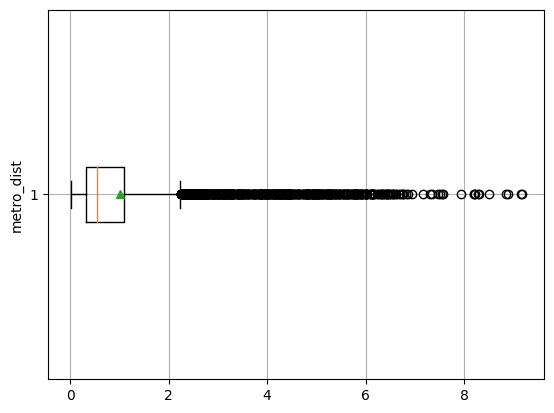

In [ ]:
Y4 = df['metro_dist']

plt.boxplot(Y4, showmeans=True, vert=False)
plt.ylabel('metro_dist')
plt.grid()
plt.show()

Ми проглянули такі характеристики, як оцінка чистоти орендного житла, загальна оцінка задоволеності гостей орендним житлом, віддаленість від центру міста та віддаленість від найближчої станції метро - нічого підозрілого.

In [ ]:
df['attr_index'].describe()

,attr_index
count,5379.000000
mean,294.575060
std,170.516734
min,68.740518
25%,177.224481
50%,247.646069
75%,361.070549
max,1438.561236


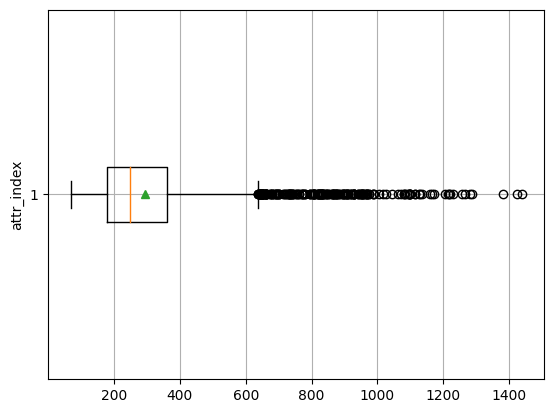

In [ ]:
Y5 = df['attr_index']

plt.boxplot(Y5, showmeans=True, vert=False)
plt.ylabel('attr_index')
plt.grid()
plt.show()

In [ ]:
df['attr_index_norm'].describe()

,attr_index_norm
count,5379.000000
mean,20.477061
std,11.853283
min,4.778421
25%,12.319565
50%,17.214844
75%,25.099422
max,100.000000


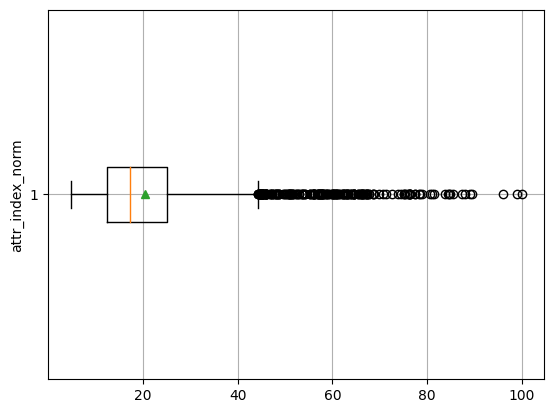

In [ ]:
Y6 = df['attr_index_norm']

plt.boxplot(Y6, showmeans=True, vert=False)
plt.ylabel('attr_index_norm')
plt.grid()
plt.show()

In [ ]:
df['rest_index'].describe()

,rest_index
count,5379.000000
mean,625.612765
std,388.206414
min,140.521722
25%,382.129695
50%,527.347208
75%,764.221221
max,5587.136047


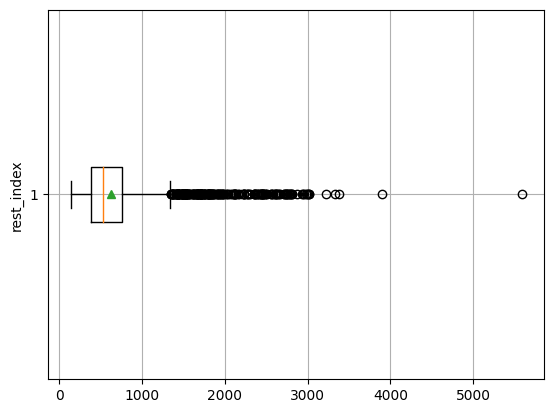

In [ ]:
Y7 = df['rest_index']

plt.boxplot(Y7, showmeans=True, vert=False)
plt.ylabel('rest_index')
plt.grid()
plt.show()

Після перевірки **rest_index** максимальне значення точки є підозрілим, відмітимо його як викид.

In [ ]:
df[df.rest_index == df.rest_index.max()]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
4576,294.691785,Private room,False,True,2.0,False,0,1,9.0,89.0,1,0.404698,0.119771,955.054051,66.389531,5587.136047,100.0,-0.13233,51.51037


In [ ]:
df.loc[df.rest_index == df.rest_index.max(), 'rest_index'] = np.NaN
df[df.isnull().sum(axis=1) > 0]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
562,NaN,Private room,False,True,2.0,False,0,0,8.0,89.0,3,4.303580,0.709035,318.806306,22.161469,666.006206,11.920351,-0.18071,51.48849
3550,NaN,Entire home/apt,False,False,6.0,False,0,0,10.0,100.0,2,2.938307,0.619716,386.733299,26.883339,781.529958,13.988024,-0.14658,51.53190
4559,NaN,Private room,False,True,2.0,False,0,0,7.0,80.0,1,5.623463,0.485578,233.766463,16.250018,444.050900,7.947737,-0.04987,51.49397
4576,294.691785,Private room,False,True,2.0,False,0,1,9.0,89.0,1,0.404698,0.119771,955.054051,66.389531,NaN,100.000000,-0.13233,51.51037


In [ ]:
df['rest_index'].describe()

,rest_index
count,5378.000000
mean,624.690206
std,382.299943
min,140.521722
25%,382.123542
50%,527.136271
75%,764.128672
max,3894.782381


In [ ]:
df['rest_index_norm'].describe()

,rest_index_norm
count,5379.000000
mean,11.197378
std,6.948218
min,2.515094
25%,6.839456
50%,9.438596
75%,13.678228
max,100.000000


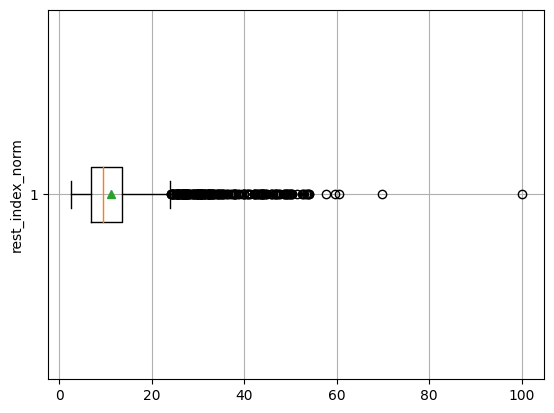

In [ ]:
Y8 = df['rest_index_norm']

plt.boxplot(Y8, showmeans=True, vert=False)
plt.ylabel('rest_index_norm')
plt.grid()
plt.show()

У випадку **rest_index_norm** максимальне значення індекса не може перебільшувати 100, а бути рівним - може, тому такий випадок допускаємо.

Отже, із характеристик усіх 4 індексів, ми помітили викид лише по одному (**rest_index**).

In [ ]:
df['lng'].describe()

,lng
count,5379.000000
mean,-0.114782
std,0.067520
min,-0.251700
25%,-0.169960
50%,-0.118130
75%,-0.067725
max,0.120180


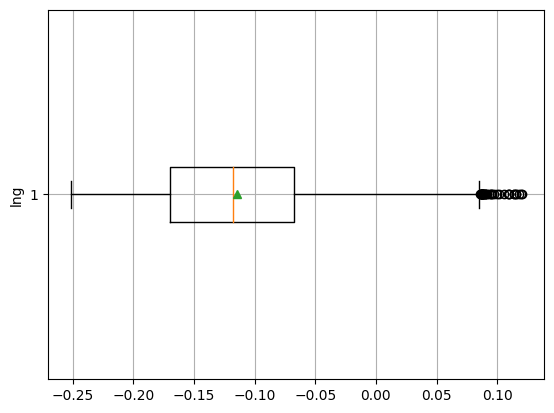

In [ ]:
Y9 = df['lng']

plt.boxplot(Y9, showmeans=True, vert=False)
plt.ylabel('lng')
plt.grid()
plt.show()

In [ ]:
df['lat'].describe()

,lat
count,5379.000000
mean,51.503457
std,0.031966
min,51.414400
25%,51.485690
50%,51.509640
75%,51.525720
max,51.575820


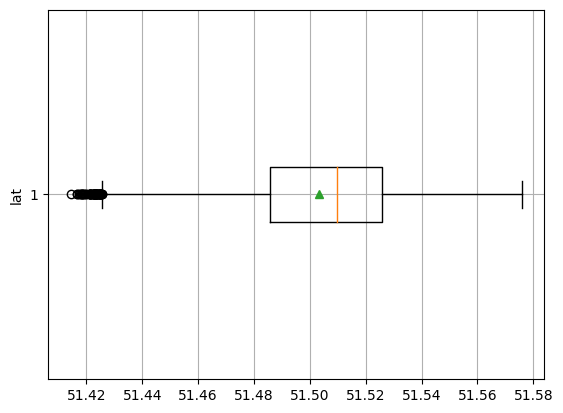

In [ ]:
Y10 = df['lat']

plt.boxplot(Y10, showmeans=True, vert=False)
plt.ylabel('lat')
plt.grid()
plt.show()

По координатам викидів не помічаємо.

In [ ]:
df[df.isnull().sum(axis=1) > 0]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
562,NaN,Private room,False,True,2.0,False,0,0,8.0,89.0,3,4.303580,0.709035,318.806306,22.161469,666.006206,11.920351,-0.18071,51.48849
3550,NaN,Entire home/apt,False,False,6.0,False,0,0,10.0,100.0,2,2.938307,0.619716,386.733299,26.883339,781.529958,13.988024,-0.14658,51.53190
4559,NaN,Private room,False,True,2.0,False,0,0,7.0,80.0,1,5.623463,0.485578,233.766463,16.250018,444.050900,7.947737,-0.04987,51.49397
4576,294.691785,Private room,False,True,2.0,False,0,1,9.0,89.0,1,0.404698,0.119771,955.054051,66.389531,NaN,100.000000,-0.13233,51.51037


Отже, пошук викидів будемо вважати завершеним. Загалом ми знайшли 4 таких значення, **3** з яких за **realSum** і **1** з яких за **rest_index**.
Очистимо датасет від них.

In [ ]:
df.shape

(5379, 19)

In [ ]:
df.isnull().sum()

,0
realSum,3
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0
guest_satisfaction_overall,0


In [ ]:
df_clean = df.dropna()

In [ ]:
df_clean.shape

(5375, 19)

In [ ]:
df_clean.isnull().sum()

,0
realSum,0
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0
guest_satisfaction_overall,0


In [ ]:
df_clean.head(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399
5,354.194595,Entire home/apt,False,False,2.0,False,0,1,9.0,93.0,0,4.467894,0.350749,321.864600,22.374063,703.068564,12.583702,-0.18805,51.49473
6,430.395823,Private room,False,True,2.0,True,0,1,10.0,97.0,1,1.787295,0.253827,509.098946,35.389453,1071.720709,19.181933,-0.11023,51.52023
7,244.831722,Private room,False,True,2.0,False,0,1,9.0,88.0,1,2.430836,0.546799,412.057147,28.643699,932.666193,16.693100,-0.11644,51.52905
8,438.157059,Entire home/apt,False,False,4.0,False,0,1,9.0,87.0,1,1.490442,0.126230,575.923337,40.034676,1454.379423,26.030858,-0.13621,51.52057
9,128.883558,Private room,False,True,2.0,True,1,0,10.0,97.0,1,12.806673,5.292438,96.536295,6.710614,195.835897,3.505121,0.03848,51.45827


Отже, пошук дублікатів, порожніх значень та викидів в нашому датасеті завершено :-)

In [ ]:
df_clean.to_csv('airbnb_london_clean.csv', index=False)